# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

# Importing Data

In [2]:
train = pd.read_csv("../data/raw/train.csv", index_col="id")
test = pd.read_csv("../data/raw/test.csv", index_col="id")

# Exploratory Data Analysis

In [3]:
def custom_describe(df):
    df_ = df.select_dtypes(include=np.number)
    des = df_.describe().T
    des["skewness"] = df_.skew()
    des["kurtosis"] = df_.kurtosis()
    des["count"] = des["count"].astype("int")
    return des

In [11]:
features = train.columns.tolist()
print(features)

numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]
categorical_features = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "day",
    "month",
    "poutcome",
]
target = "y"

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


## Target Analysis

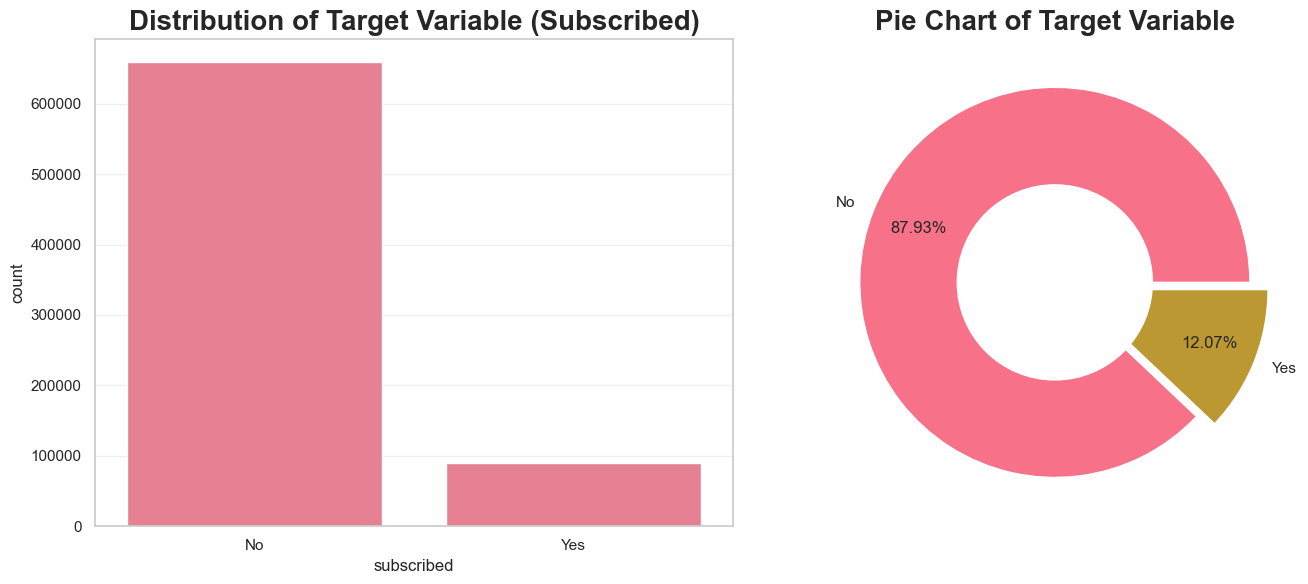

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x=target, data=train, ax=axes[0])
axes[0].set_title(
    "Distribution of Target Variable (Subscribed)", fontweight="bold", size=20
)
axes[0].set_xticks(ticks=[0, 1], labels=["No", "Yes"])
axes[0].set_xlabel("subscribed")

train[target].value_counts().plot(
    kind="pie",
    ax=axes[1],
    explode=(0.0, 0.1),
    autopct="%.2f%%",
    labels=["No", "Yes"],
    pctdistance=0.75,
)
axes[1].add_artist(plt.Circle((0, 0), 0.5, fc="w"))
axes[1].set_title("Pie Chart of Target Variable", fontweight="bold", size=20)
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## Numerical Feature Analysis

In [ ]:
custom_describe(train[numerical_features])

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
age,750000,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0,0.586137,-0.069561
balance,750000,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0,12.304123,268.863623
duration,750000,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0,2.048776,6.434523
campaign,750000,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0,4.810437,37.493557
pdays,750000,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0,3.625049,13.597849
previous,750000,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0,13.749885,820.304755


In [ ]:
def numerical_features_plot(df, feature, target):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Analysis of {feature}", fontsize=16, fontweight="bold")

    # Boxplot
    sns.boxplot(data=df, x=feature, y=target, hue=target, orient="h", ax=axes[0])
    axes[0].set_title(f"Boxplot of {feature}")
    axes[0].legend_.remove()  # Turn off legend

    # Violinplot
    sns.violinplot(data=df, x=feature, y=target, hue=target, orient="h", ax=axes[1])
    axes[1].set_title(f"Violinplot of {feature}")
    axes[1].legend_.remove()  # Turn off legend

    # Histogram with KDE
    sns.histplot(data=df, x=feature, hue=target, kde=True, ax=axes[2], alpha=0.6)
    axes[2].set_title(f"Distribution of {feature}")

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

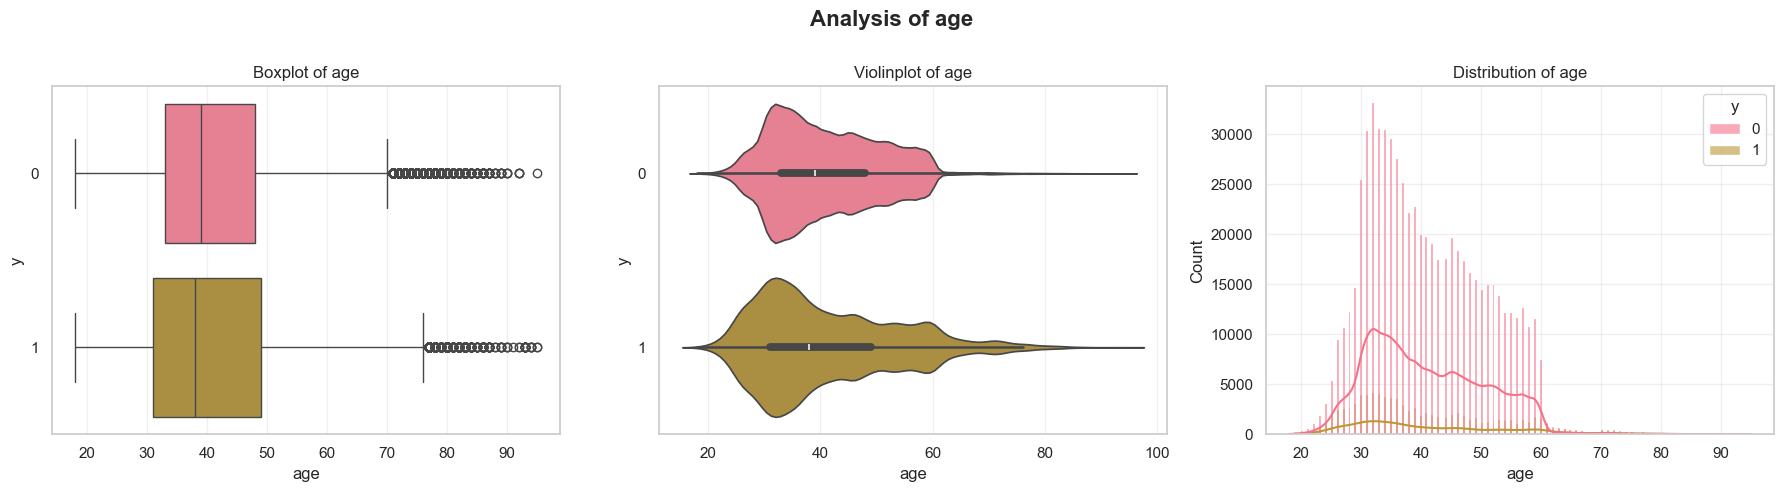

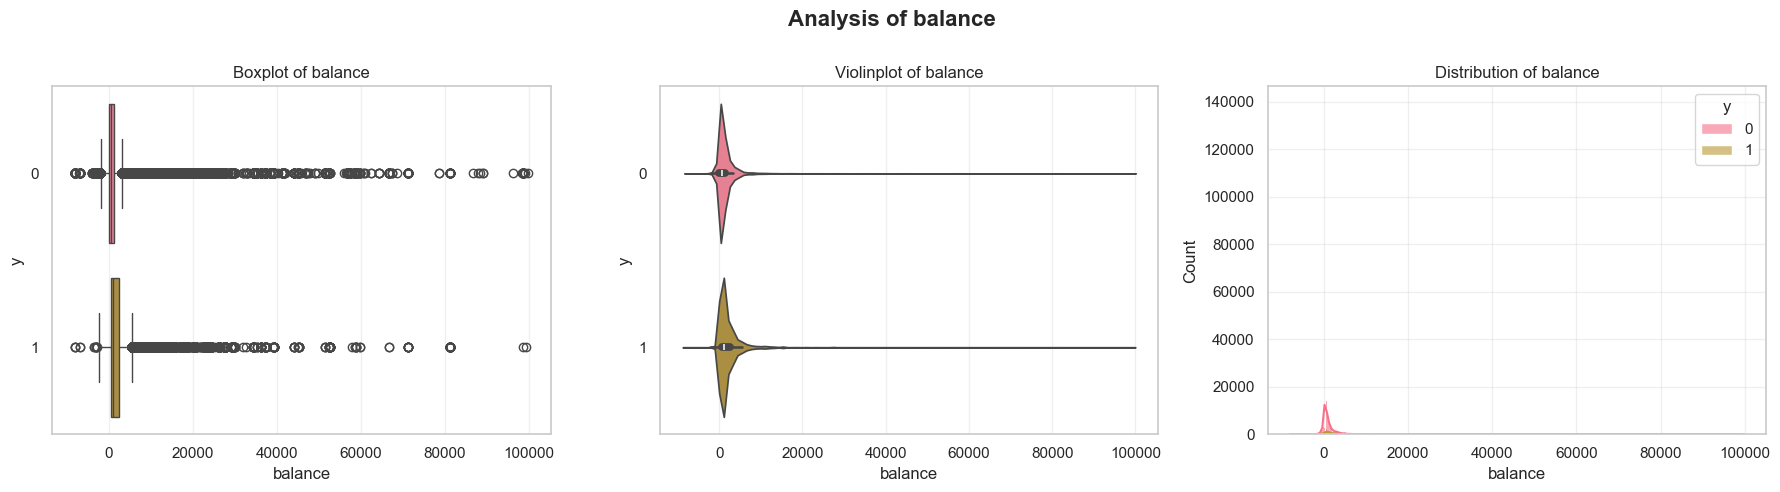

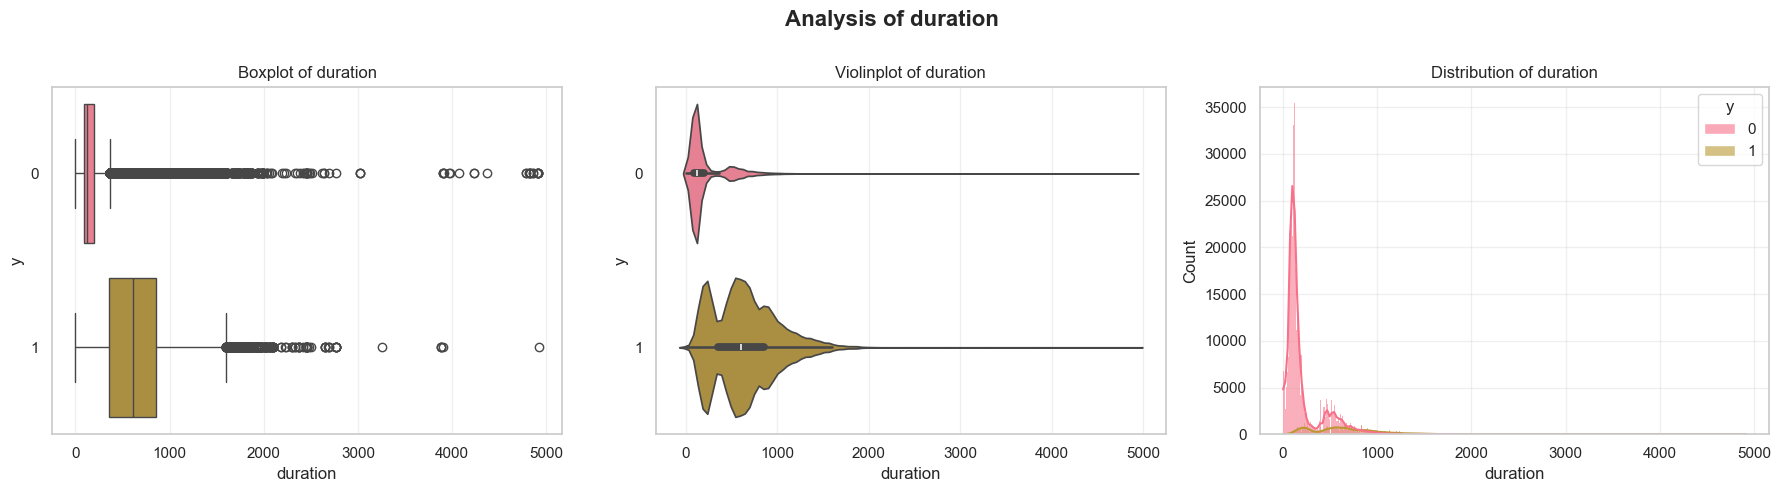

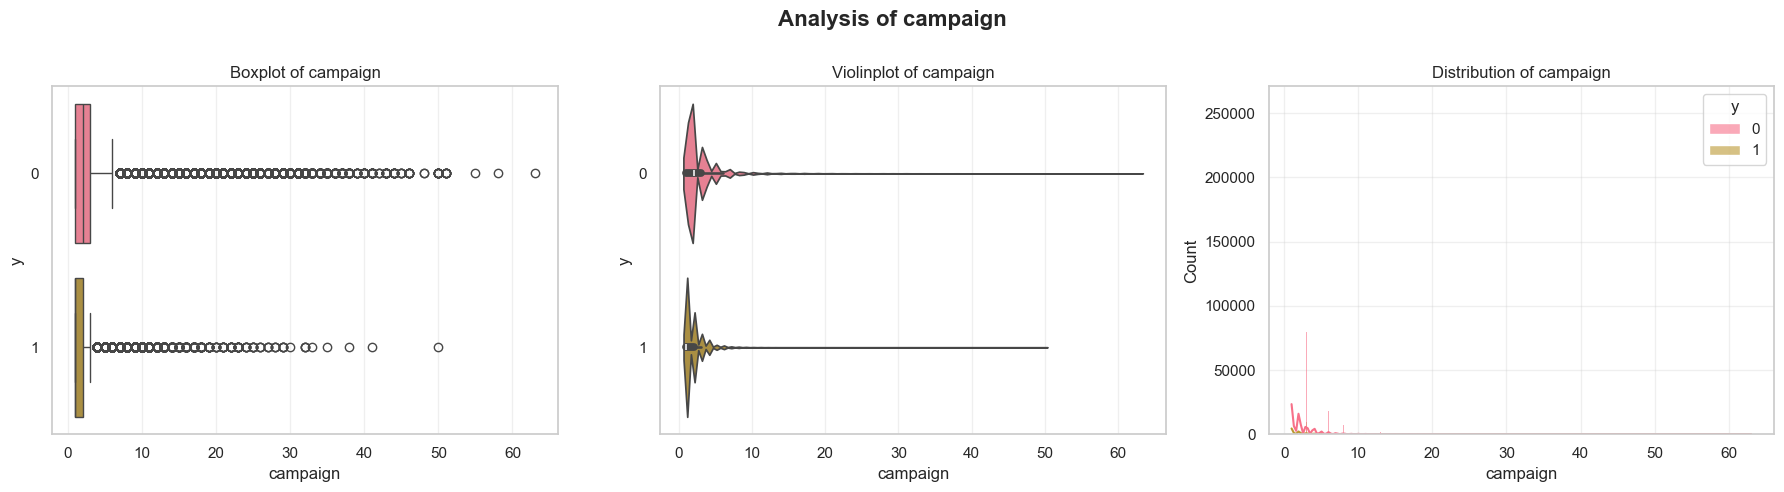

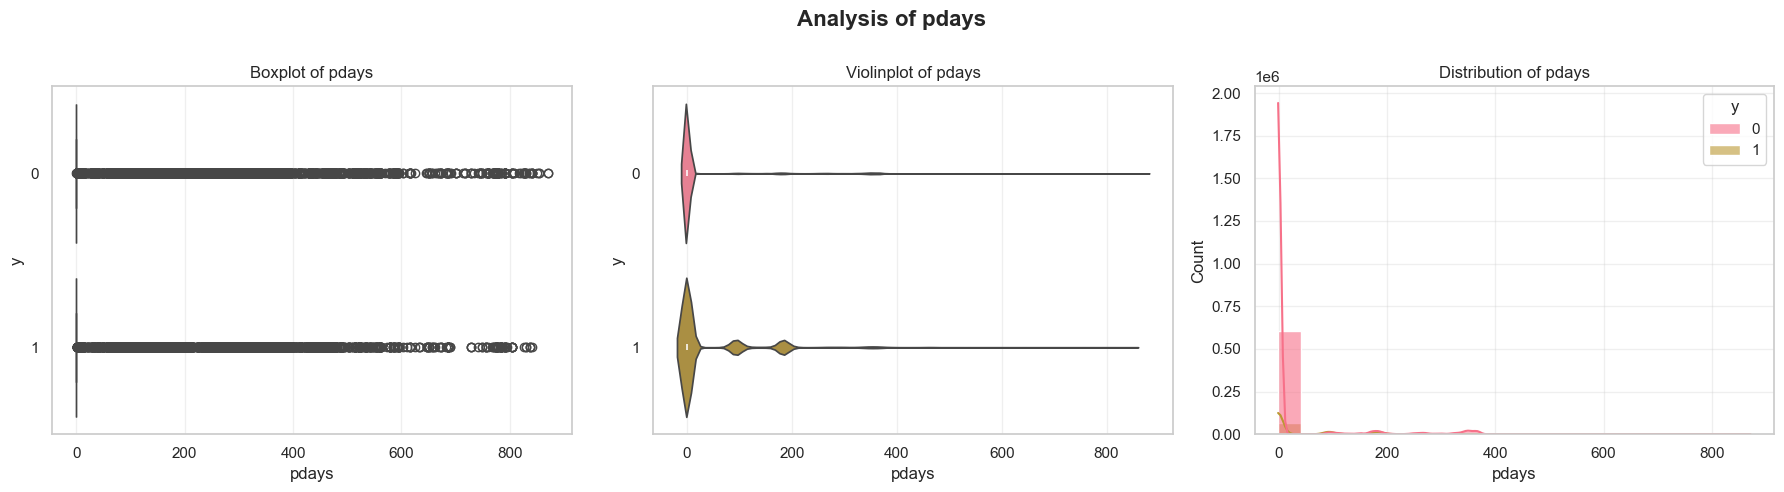

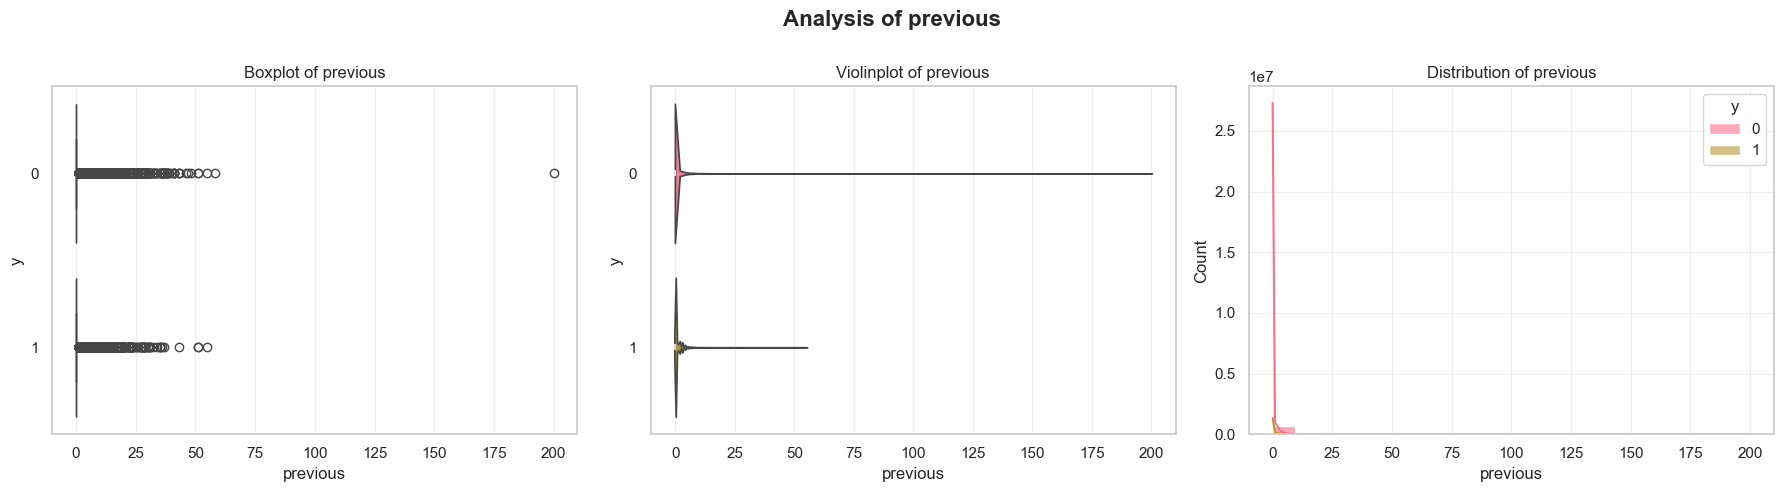

In [ ]:
for feature in numerical_features:
    numerical_features_plot(train, feature, target)

## Categorical Feature Analysis

In [ ]:
def categorical_features_plot(df, feature):
    value_counts = df[feature].value_counts()

    top_n = min(10, len(value_counts))
    top_categories = value_counts.nlargest(top_n)

    df_plot = df[df[feature].isin(top_categories.index)]

    top_percentages = (top_categories / len(df)) * 100

    plt.figure(figsize=(25, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(df_plot, x=feature, palette=sns.color_palette("viridis"))
    plt.title(
        f"Count Plot of{(' Top ' + str(top_n)) if len(value_counts) > 10 else ''} Categories of {feature}",
        size=16,
        fontweight="bold",
    )

    plt.subplot(1, 2, 2)
    plt.pie(
        top_percentages,
        labels=top_percentages.index,
        autopct=lambda pct: f"{pct:.2f}%",
        pctdistance=0.75,
    )
    plt.gca().add_artist(plt.Circle((0, 0), 0.5, fc="w"))  # Donut hole
    plt.title(
        f"{('Top ' + str(top_n)) if len(value_counts) > 10 else ''} {feature} Categories as % of Full Dataset",
        size=16,
        fontweight="bold",
    )
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

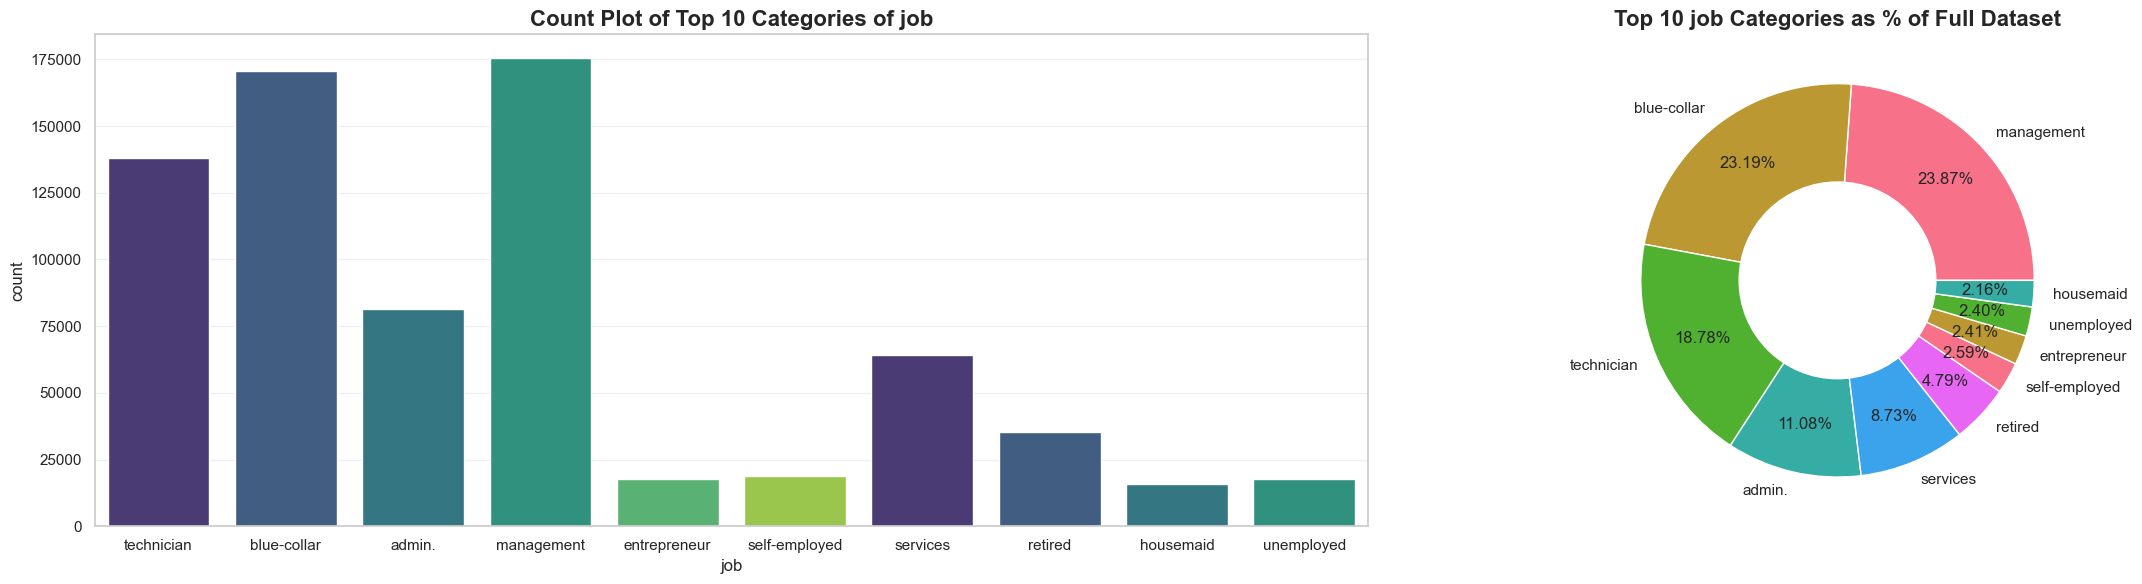

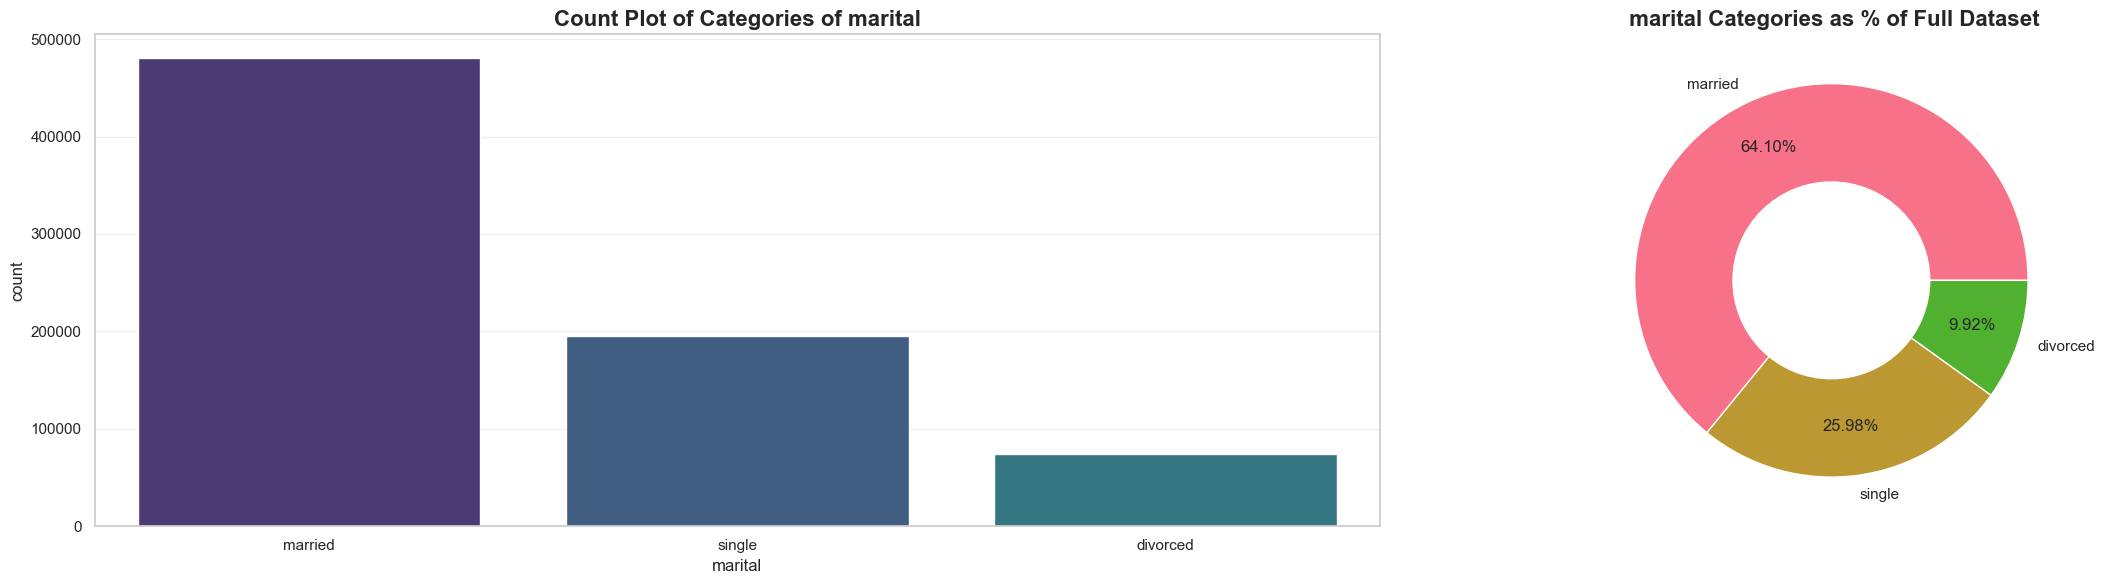

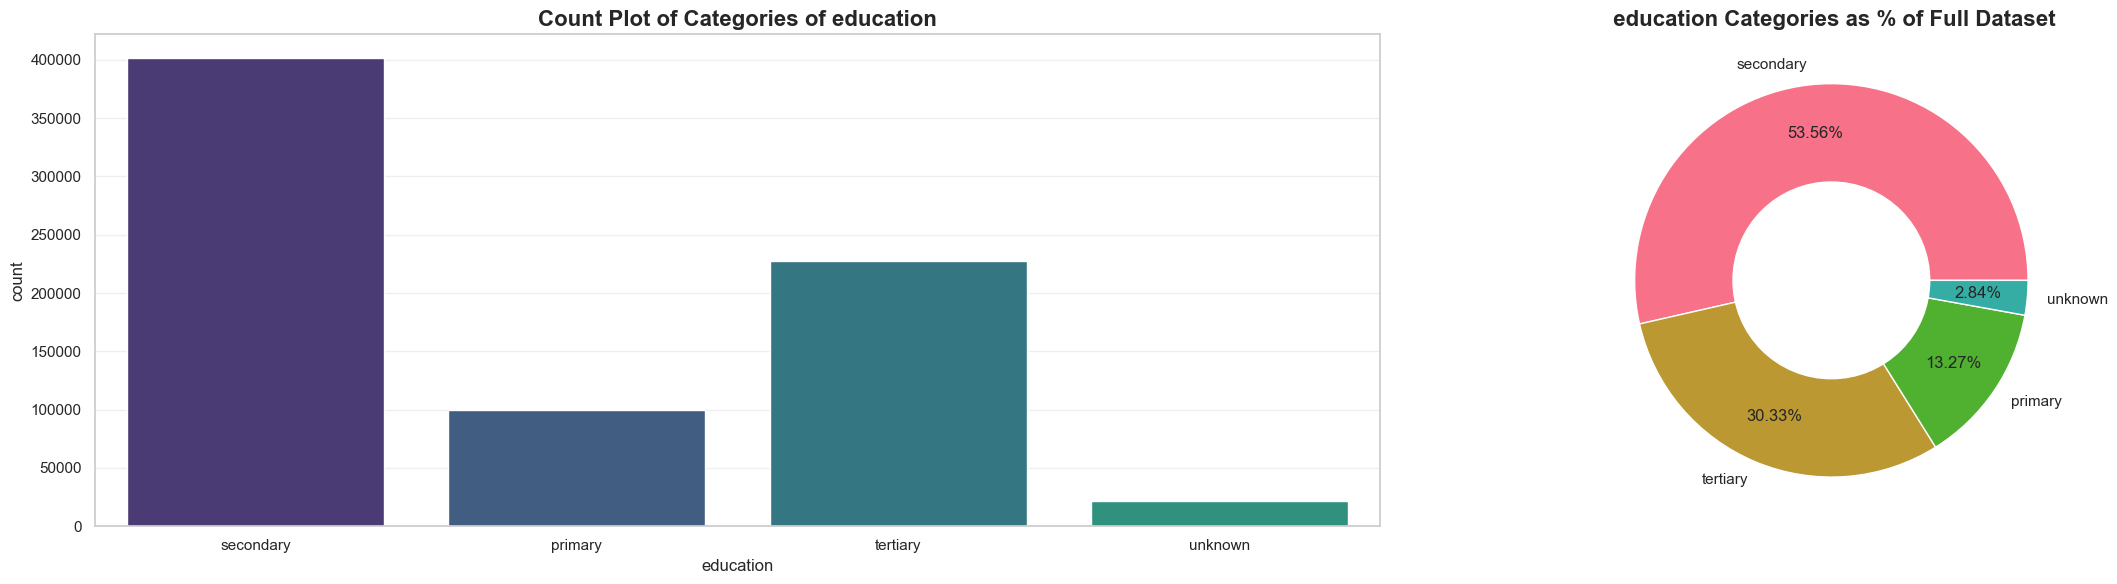

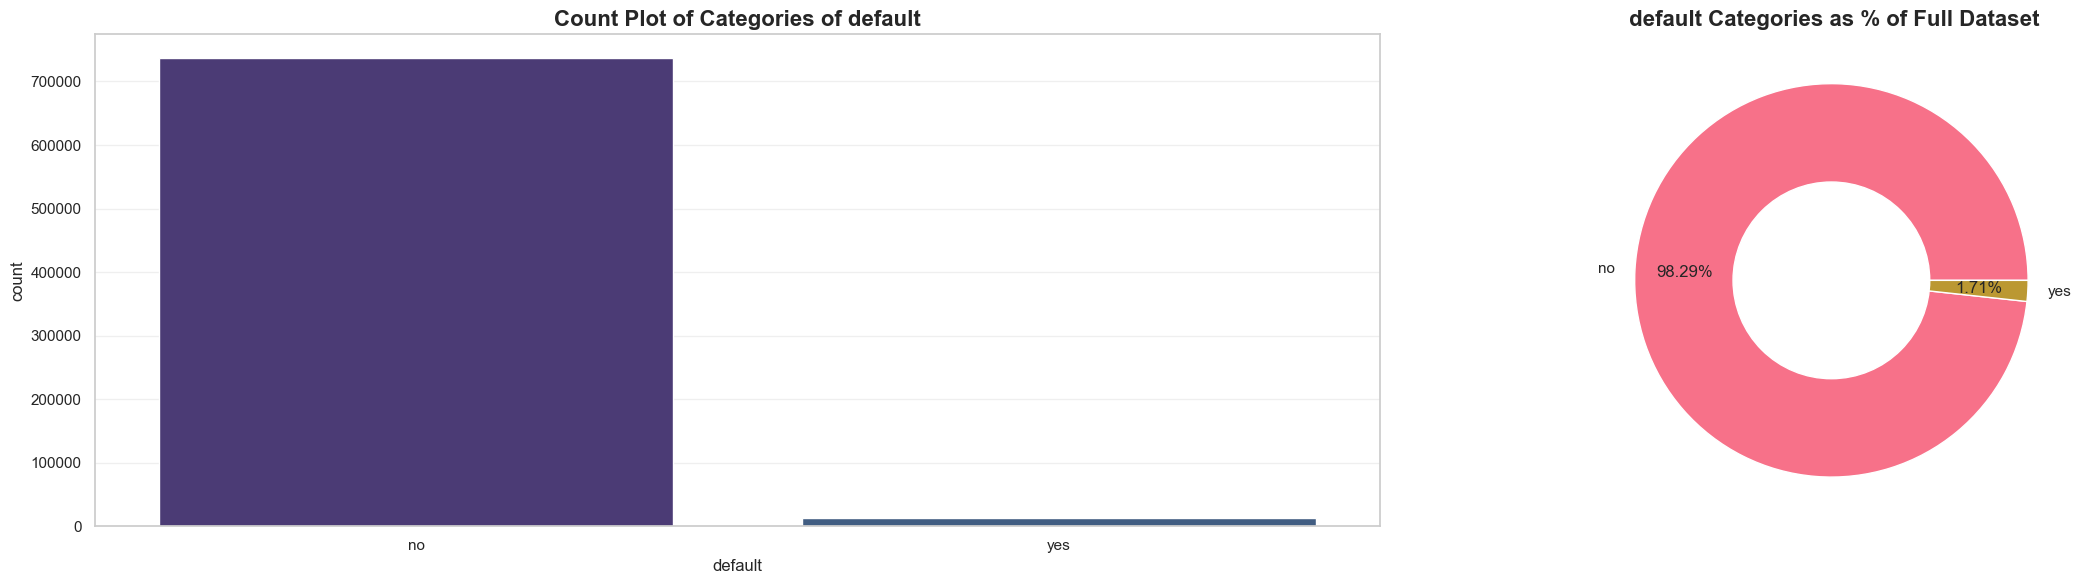

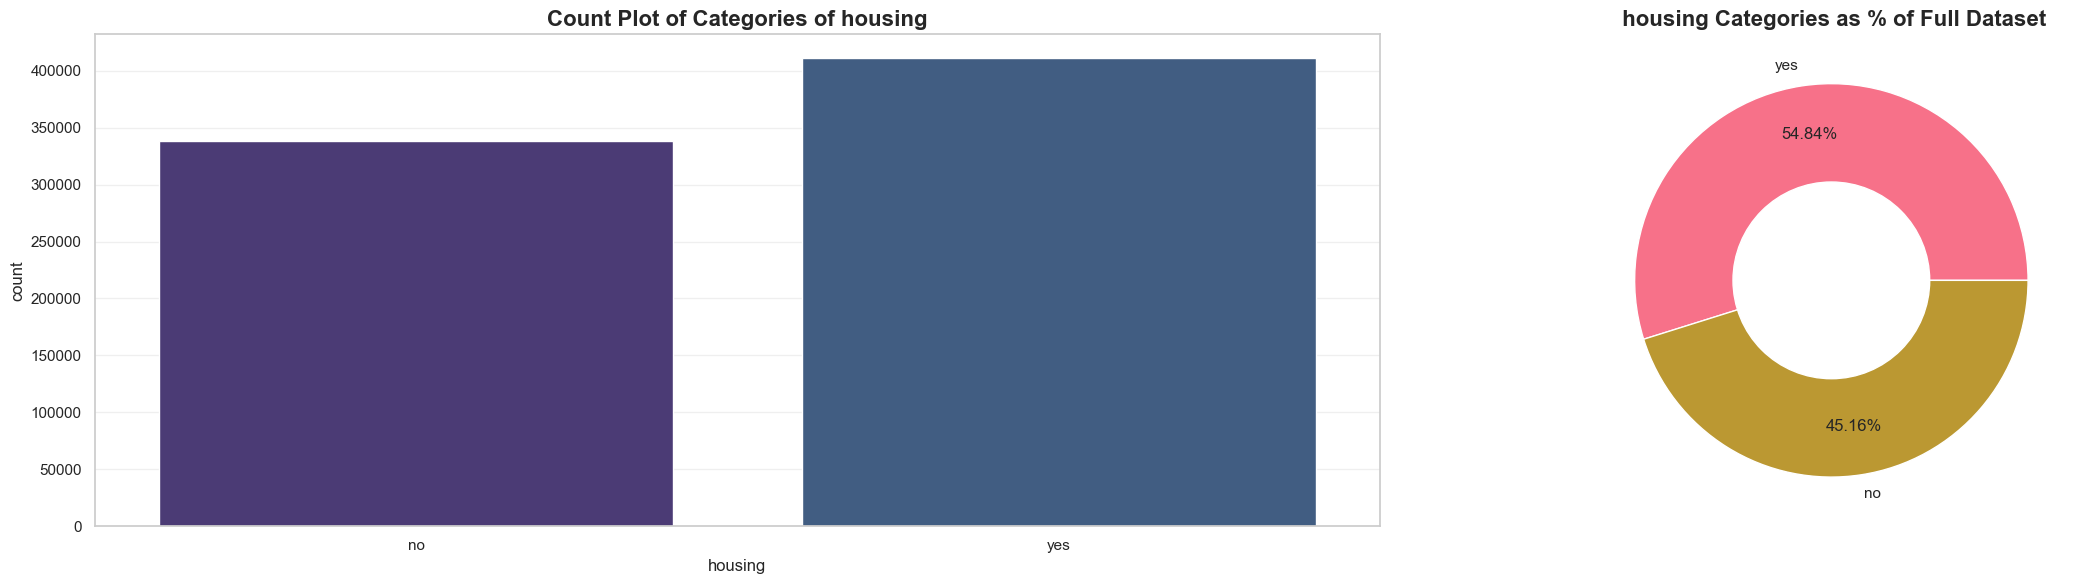

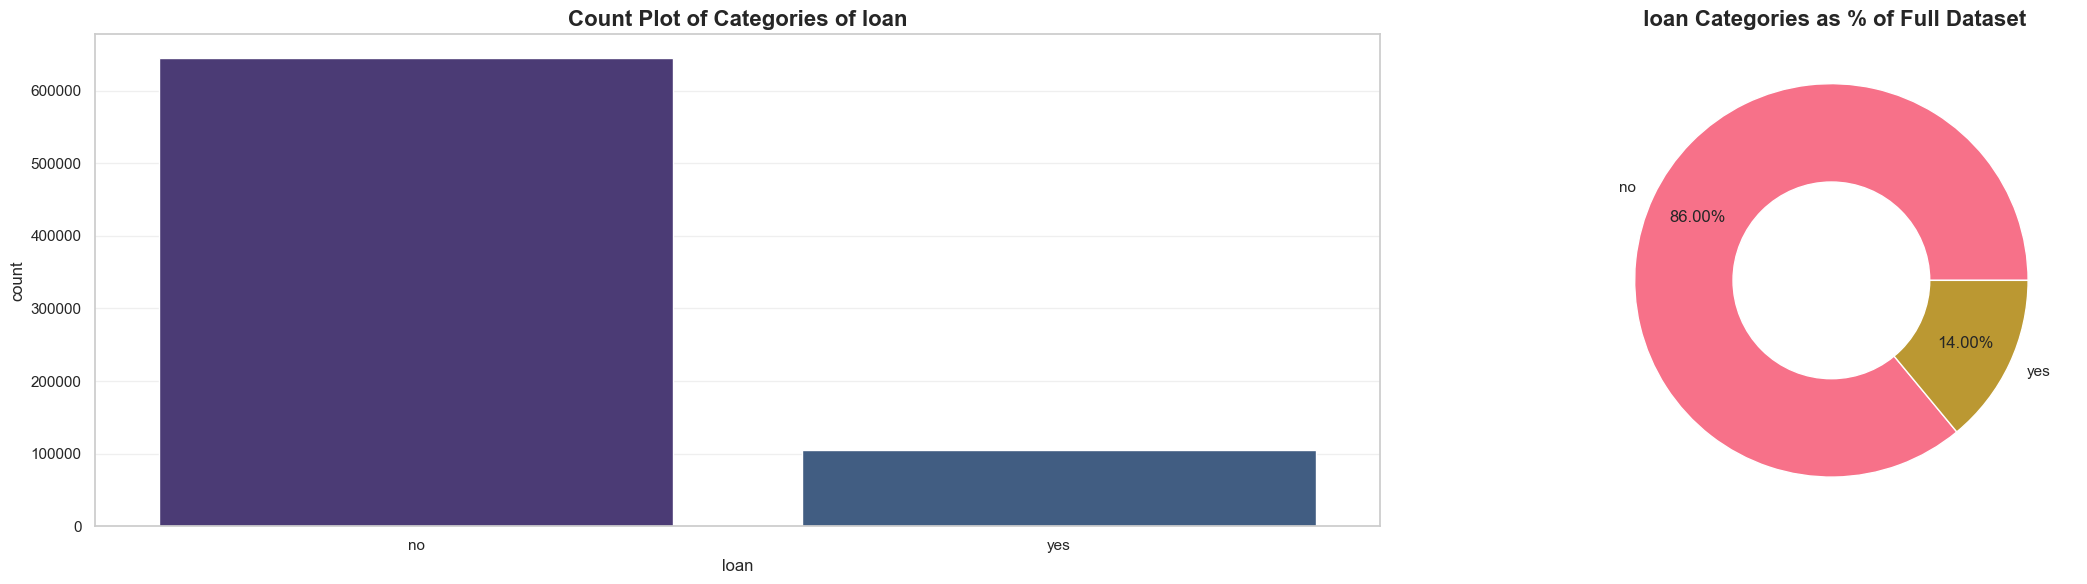

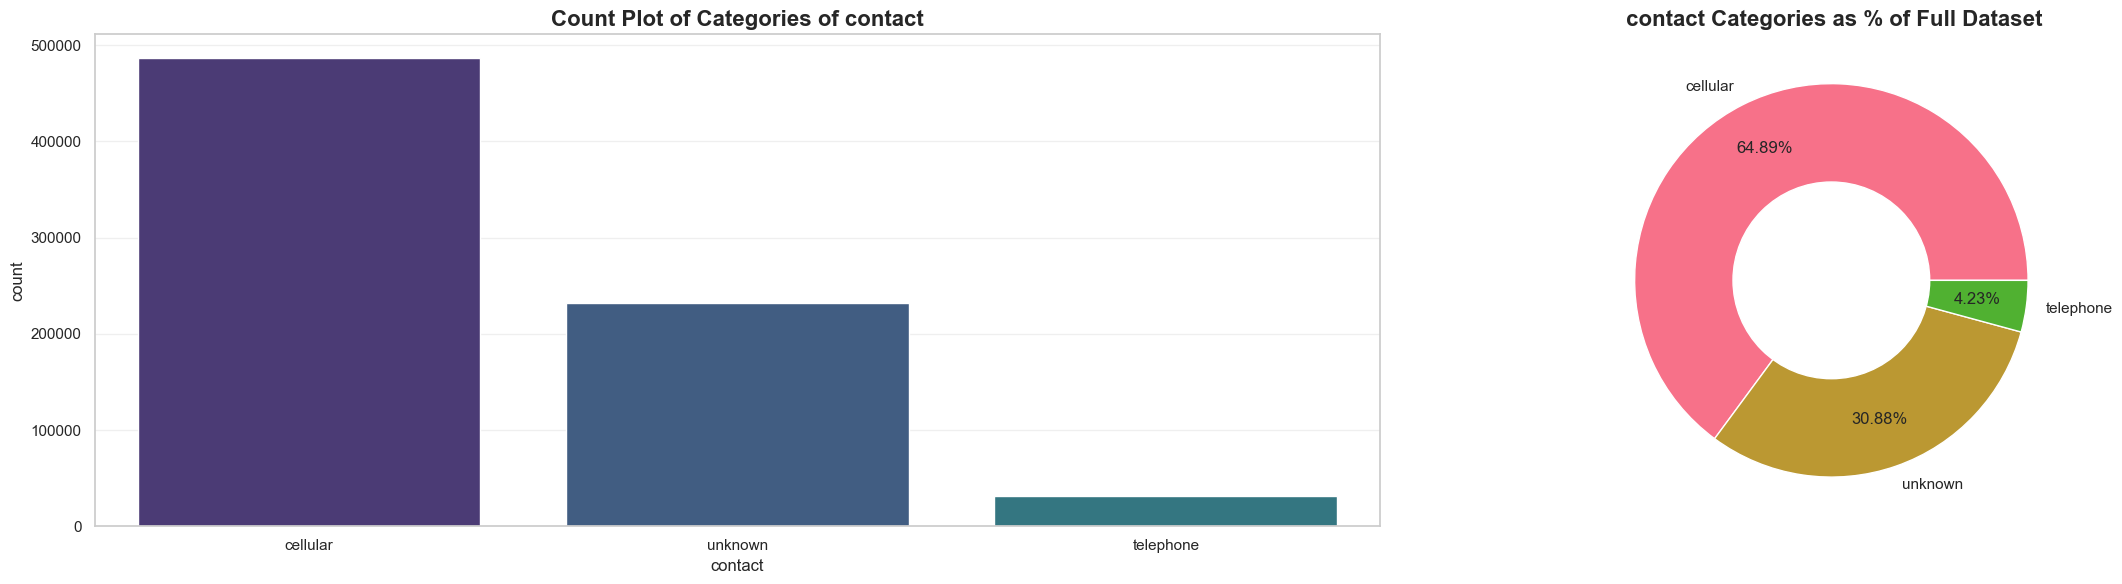

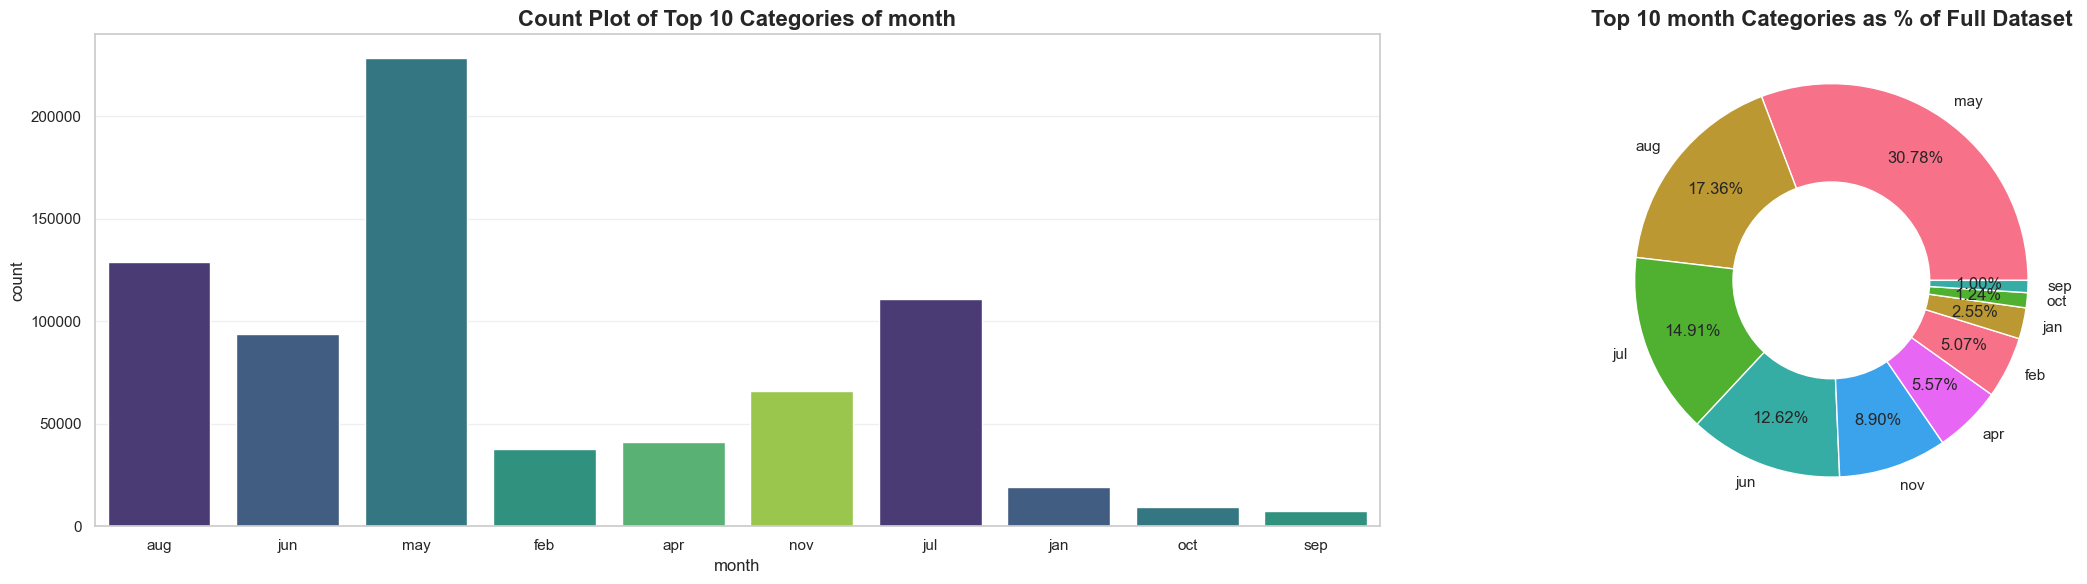

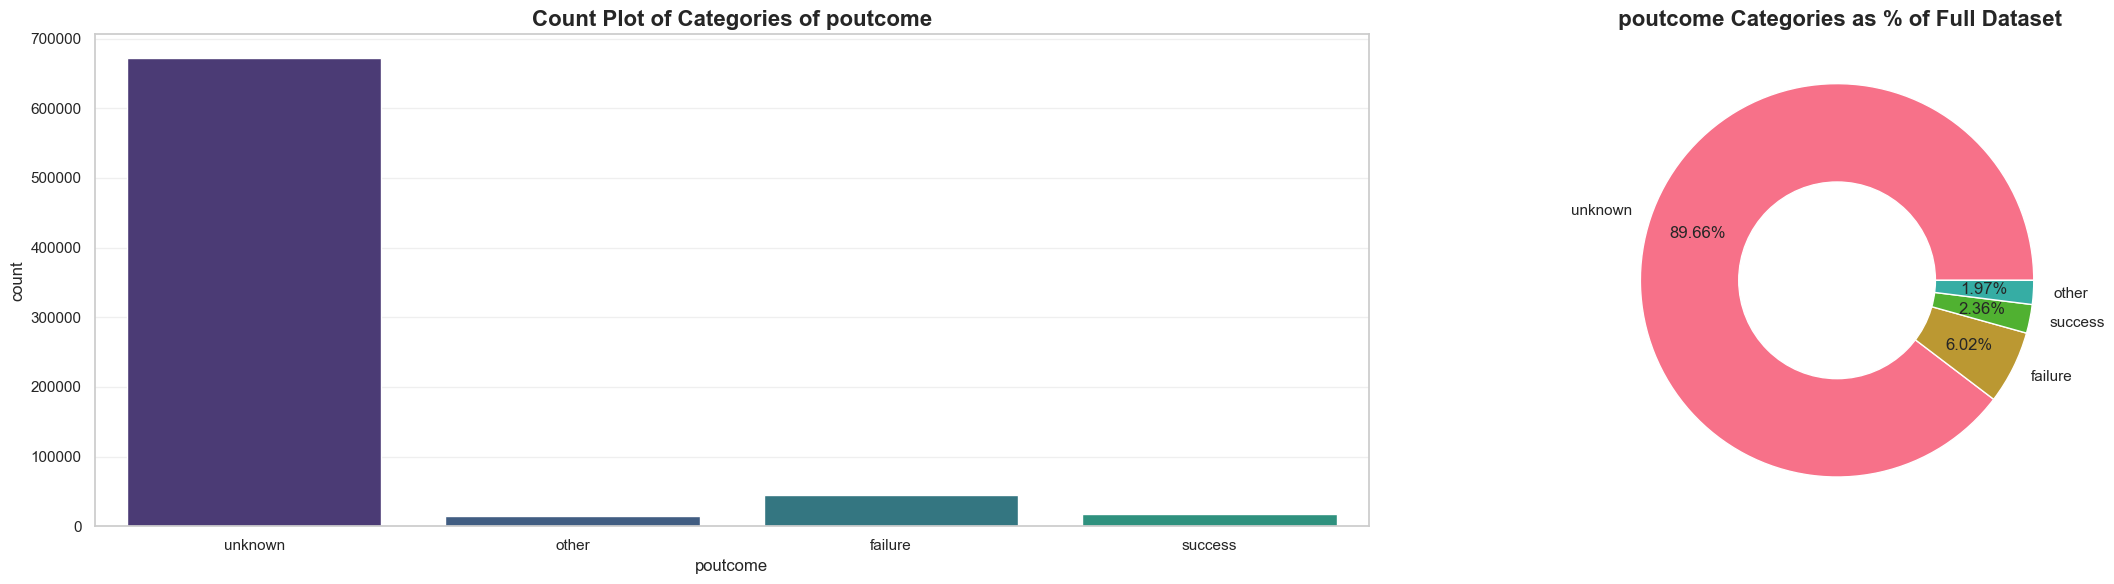

In [ ]:
for feature in categorical_features:
    if feature == "day":
        continue
    categorical_features_plot(train, feature)

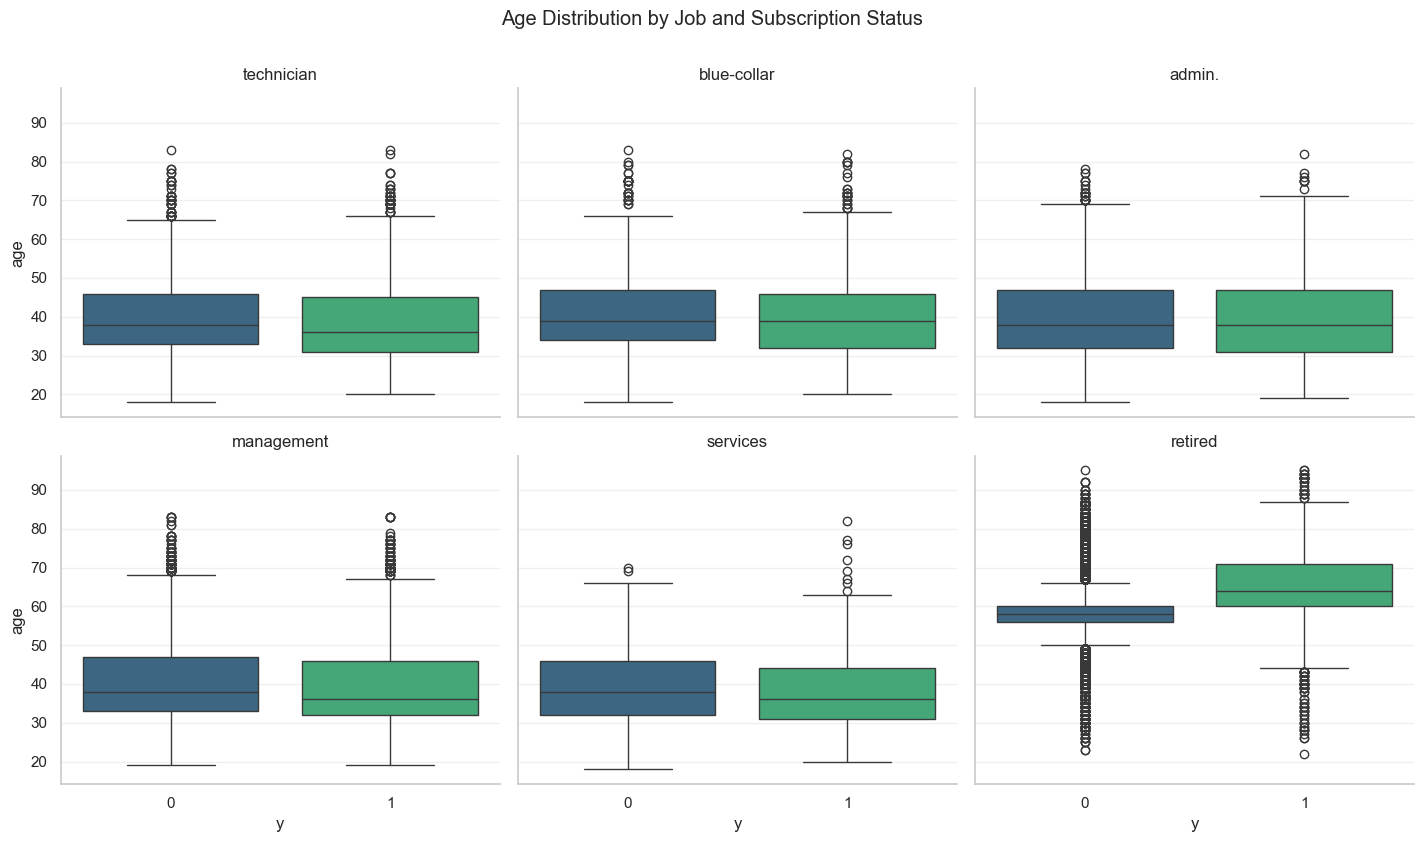

In [ ]:
df = train.copy()

g = sns.FacetGrid(
    df[df["job"].isin(df["job"].value_counts().head(6).index)],
    col="job",
    col_wrap=3,
    height=4,
    aspect=1.2,
)
g.map_dataframe(sns.boxplot, x="y", y="age", palette="viridis")
g.set_titles("{col_name}")
g.fig.suptitle("Age Distribution by Job and Subscription Status", y=1.05)
plt.show()

In [ ]:
def plot_categorical_heatmap(feature1, feature2):
    cross_tab = pd.crosstab(df[feature1], df[feature2], normalize="index") * 100
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
    plt.title(f"Percentage of Subscription by {feature1} and {feature2}")
    plt.ylabel(feature1)
    plt.xlabel(feature2)
    plt.show()

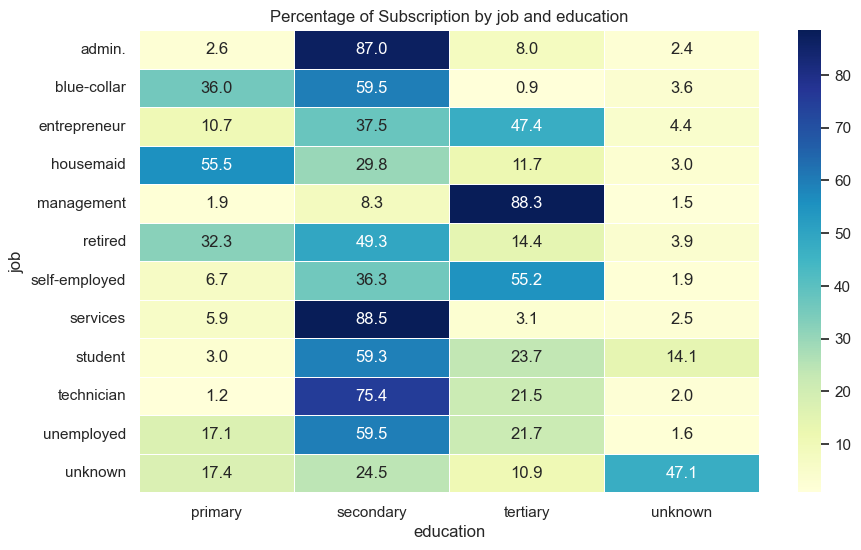

In [ ]:
plot_categorical_heatmap("job", "education")

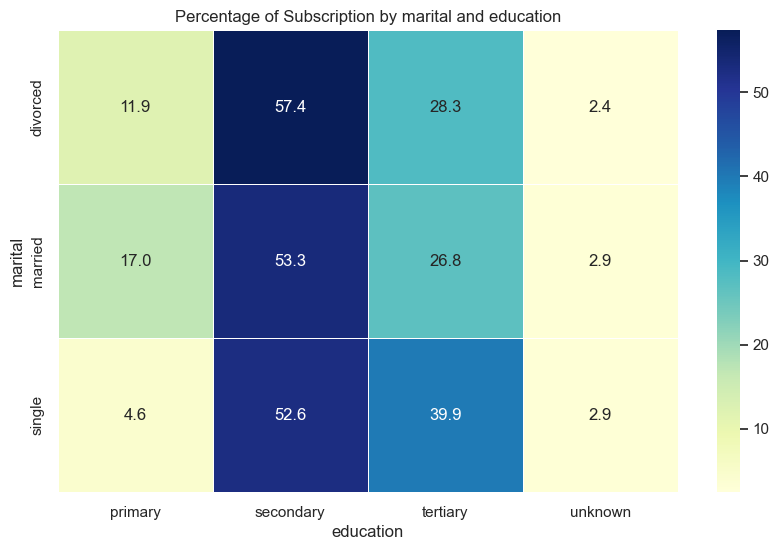

In [ ]:
plot_categorical_heatmap("marital", "education")

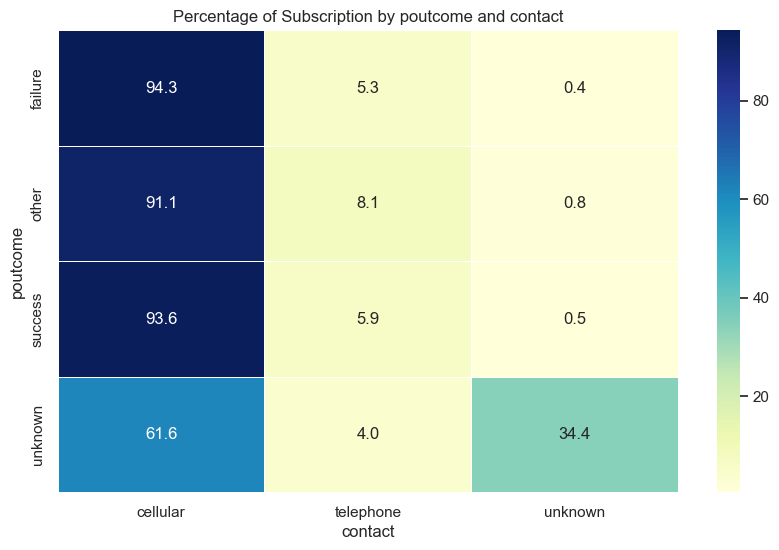

In [ ]:
plot_categorical_heatmap("poutcome", "contact")

# Model Training

In [5]:
def data_process(
    df,
):  # Source: https://www.kaggle.com/code/haohuanchen/ps-s5e8-lightgb-model-a-simple-starter
    df = df.copy()

    def many_no(x):
        if x["default"] == "no" and x["housing"] == "no" and x["loan"] == "no":
            return 21
        if (
            x["default"] == "no"
            and x["housing"] == "no"
            or x["default"] == "no"
            and x["loan"] == "no"
            or x["housing"] == "no"
            and x["loan"] == "no"
        ):
            return 7
        if x["default"] == "no" or x["housing"] == "no" or x["loan"] == "no":
            return 3
        return 0

    df["many_no"] = df.apply(lambda x: many_no(x), axis=1)

    return df

In [6]:
from sklearn.model_selection import StratifiedKFold

X = train.drop("y", axis=1)
y = train["y"]

X_str = data_process(X).astype("str")
test_str = data_process(test).astype("str")

In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.base import clone

cat_clf = CatBoostClassifier(
    allow_writing_files=False,
    verbose=False,
    task_type="CPU",
    loss_function="CrossEntropy",
    use_best_model=True,
    cat_features=X_str.columns.to_list(),
    n_estimators=5,
    learning_rate=0.1,
)

N_SPLITS = 2
skfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=0)
test_pred = np.zeros(len(test_str))
roc_scores = []

for fold, (train_idx, test_idx) in enumerate(skfold.split(X_str, y), 1):
    X_train, X_test = X_str.iloc[train_idx], X_str.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = clone(cat_clf)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=200,
        verbose=500,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_pred)
    roc_scores.append(roc_score)

    test_pred += model.predict_proba(test_str)[:, 1]
    print(f"Fold {fold} -> ROC-AUC: {roc_score:.5f}")

print(f"Average Fold ROC-AUC: {np.mean(roc_scores):.5f} \xb1 {np.std(roc_scores):.5f}")

test_pred = test_pred / N_SPLITS

0:	learn: 0.6322115	test: 0.6322236	best: 0.6322236 (0)	total: 190ms	remaining: 760ms
4:	learn: 0.4543611	test: 0.4536183	best: 0.4536183 (4)	total: 726ms	remaining: 0us

bestTest = 0.4536183338
bestIteration = 4

Fold 1 -> ROC-AUC: 0.93893
0:	learn: 0.6320024	test: 0.6320137	best: 0.6320137 (0)	total: 167ms	remaining: 668ms
4:	learn: 0.4551793	test: 0.4539673	best: 0.4539673 (4)	total: 683ms	remaining: 0us

bestTest = 0.4539673436
bestIteration = 4

Fold 2 -> ROC-AUC: 0.93571
Average Fold ROC-AUC: 0.93732 ± 0.00161


# Submission

In [ ]:
# sub = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")
# sub['y'] = test_pred
# sub.to_csv("submission.csv", index=False)
# sub.head()